# Implementation of the K-Means algorithm (Java/Python ML library classes/API can be used) and visualize the data in 2-D space before clustering. Compare the performance of K-means clustering algorithm with DBSCAN algorithm. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Read the data
dataFrame = pd.read_csv('../Datasets/clusterData.csv')
dataFrame = dataFrame.drop('column3', axis=1)

In [3]:
# Steps of K-Means:
    # Initialization Randomly select K initial cluster centroids.
    # Assign Points to the Nearest Centroid
        # For each point, calculate the Euclidean distance to both centroids 
        # and assign the point to the closest one.
        
    # Update Centroids
    # C1, C2 = mean(previous point, newly added point)
    # Reassign Points to the Nearest Centroid
        # Recalculate distances and reassign points based on the updated centroids.
k = int(input("Please enter the k value: "))

clasterIndex = [random.randint(0, len(dataFrame)) for _ in range(k)]

# Select centroid randomly
centroids = dataFrame.iloc[clasterIndex].values
# Dataset
x = dataFrame.values

Please enter the k value: 3


In [4]:
# Random centroid values
print(centroids)

[[ 1.67  9.32]
 [ 5.61 12.47]
 [ 0.77  1.13]]


In [5]:
# Main implementation
k_meansClusterResult = {}
levels = []
for i in range(k):
    k_meansClusterResult['C'+str(i+1)] = []
    levels.append('Group {0}'.format(i+1))

while True:
    for i, value in enumerate(x):
        # Calculate the distance and find group them
        # Compute the Euclidean distance to each centroid
        distances = np.sqrt(np.sum((centroids - value) ** 2, axis=1))

        # Find the index of the nearest centroid
        nearest_index = np.argmin(distances)
        
        k_meansClusterResult['C'+str(nearest_index+1)].append(value)
    
    new_centroid_values = {}
    for key, values in k_meansClusterResult.items():
        values_array = np.array(values)
        new_centroid_values[key] = np.mean(values_array, axis=0)
        
    comparison = np.allclose(centroids, list(new_centroid_values.values()))
    
    if comparison:
        break
    else:
        for key, values in k_meansClusterResult.items():
            
            k_meansClusterResult[key] = []
        centroids = list(new_centroid_values.values())

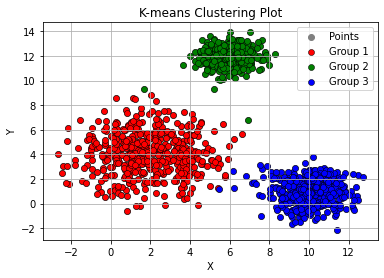

In [6]:
# Convert the normal list of points into a numpy array
points_np = np.array(x)

# Plot the points from the normal list
plt.scatter(points_np[:, 0], points_np[:, 1], color='gray', label='Points')

# Plot the points from the k_meansClusterResult (each cluster in a different color)
colors = ['r', 'g', 'b']
for i, (cluster, points_list) in enumerate(k_meansClusterResult.items()):
    
    cluster_points = np.array(points_list)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i],
                label=levels[i], edgecolors='black',  linewidths=0.5)
    
# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means Clustering Plot')

# Show legend
plt.legend()
plt.grid()

# Display the plot
plt.show()

## DBSCAN algorithm

In [13]:
# Define Parameters
eps = float(input("Please enter the epsilon (eps) value: "))
min_samples = int(input("Please enter the minimum number of samples (min_samples): "))

Please enter the epsilon (eps) value: 0.6
Please enter the minimum number of samples (min_samples): 5


In [14]:
from collections import deque

# DBSCAN implementation
def dbscan(X, eps, min_pts):
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1)
    cluster_id = 0
    visited = np.zeros(n_samples, dtype=bool)

    def region_query(point):
        distances = np.linalg.norm(X - point, axis=1)
        return np.where(distances <= eps)[0]

    for i in range(n_samples):
        if visited[i]:
            continue
        visited[i] = True
        neighbors = region_query(X[i])
        if len(neighbors) < min_pts:
            labels[i] = -1  # Mark as noise
        else:
            labels[i] = cluster_id
            queue = deque(neighbors)
            while queue:
                neighbor = queue.popleft()
                if not visited[neighbor]:
                    visited[neighbor] = True
                    new_neighbors = region_query(X[neighbor])
                    if len(new_neighbors) >= min_pts:
                        queue.extend(new_neighbors)
                if labels[neighbor] == -1:
                    labels[neighbor] = cluster_id
            cluster_id += 1
    return labels

# Run DBSCAN
cluster_labels = dbscan(x, eps, min_samples)

# Organize Cluster Results into Dictionary
dbscanClusterResult = {}
unique_clusters = set(cluster_labels)
for cluster in unique_clusters:
    if cluster != -1:  # Skip noise points
        dbscanClusterResult[f'C{cluster}'] = x[np.array(cluster_labels) == cluster]
noise_points = x[np.array(cluster_labels) == -1]  # Collect noise points


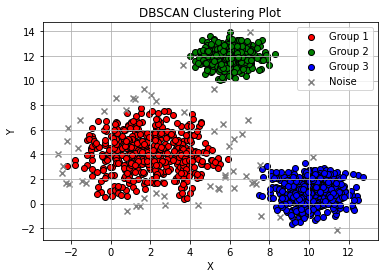

In [15]:
# Visualization
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, (cluster, points) in enumerate(dbscanClusterResult.items()):
    cluster_points = np.array(points)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label='Group {0}'.format(i+1), edgecolors='black')

# Plot Noise Points
if len(noise_points) > 0:
    plt.scatter(noise_points[:, 0], noise_points[:, 1], color='gray', label='Noise', edgecolors='black', marker='x')

# Add Labels and Title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering Plot')
plt.legend()
plt.grid()

# Display the Plot
plt.show()